# Data Dive 4 - Surfboard Specification and Review Data
## By: Alex, Cayson, and William
## Due: 4/13/21

# Objective: What is the most perfered Surfboard based on maneuverability and board type.

## DATA Source: https://www.kaggle.com/loureiro85/surfing

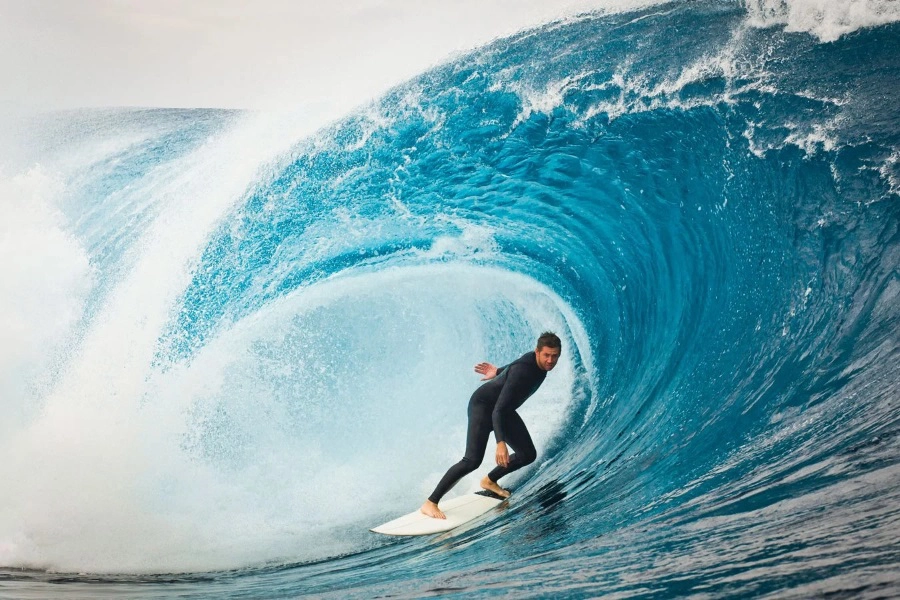

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from collections import Counter

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings

import missingno as msn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.sparse as sp
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Importing our Data

In [2]:
df_surf = pd.read_csv("df_surf.csv")

In [4]:
df_surf.columns

Index(['Unnamed: 0', 'board_adequate', 'board_how_many', 'board_length',
       'board_nose_rocker', 'board_nose_shape', 'board_tail_rocker',
       'board_tail_shape', 'board_thickness', 'board_type', 'board_volume',
       'board_width', 'manoeuvres_01_paddling', 'manoeuvres_02_drop',
       'manoeuvres_03_straight_ahead', 'manoeuvres_04_wall_riding',
       'manoeuvres_05_floater', 'manoeuvres_06_cut_back',
       'manoeuvres_07_carve', 'manoeuvres_08_off_the_lip',
       'manoeuvres_09_tube', 'manoeuvres_10_air', 'performance_control',
       'performance_ease_paddling', 'performance_flotation',
       'performance_hold', 'performance_manoeuvrability',
       'performance_passing_through', 'performance_stability',
       'performance_surf_speed', 'surfer_age', 'surfer_exercise_frequency',
       'surfer_experience', 'surfer_gender', 'surfer_height', 'surfer_style',
       'surfer_weight', 'surfer_weight_distribution', 'wave_height',
       'wave_shape', 'wave_height_min', 'wave_hei

## Data Dictionary

### board_adequate - Board Adaquacy

### board_how_many - How many of that surfboard used

### board_length - Length of board

### board_nose_rocker - Nose rocker angle (This is what prevents the board from cutting into a wave)
       
### board_nose_shape - Shape of nose
           
### board_tail_rocker - Tail rocker angle
      
### board_tail_shape - Shape of tail

### board_thickness - Thickness of the surfboard

### board_type - Type of board used

### board_volume - Volume of the board
      
### board_width - Width of the board

### manoeuvres_01_paddling - Laying on Stomach paddling to gain momentum

### manoeuvres_02_drop - Being pulled into a large wave (Usually using a jetski) 

### manoeuvres_03_straight_ahead - Surfing straight into a wave

### manoeuvres_04_wall_riding - Riding the inner wall of a wave

### manoeuvres_05_floater - Gliding over the broken tops of a wave

### manoeuvres_06_cut_back - Turn that takes the surfer back to the curl of the wave

### manoeuvres_07_carve - A sharp turn used to aggressively turn into a wave

### manoeuvres_08_off_the_lip - The surfer rides to the top of a wave then cuts down the inside without losing momentum
       
### manoeuvres_09_tube - Riding the the inside of a fully curled wave

### manoeuvres_10_air - Quickly riding up a wave to jump over it

### performance_control - How well the board controls

### performance_ease_paddling - How eacy it is to paddle on the board

### performance_flotation - How well the board floats

### performance_hold - How strong the hold is on the board

### performance_manoeuvrability - How easy is it to perform manoeuvres on the board. 

### performance_passing_through - How well does the board pass through waves

### performance_stability - How stable is the board

### performance_surf_speed - How fast is the board

### surfer_age - How old is the surfer

### surfer_exercise_frequency - How often does the surfer exercise 

### surfer_experience - How much experience doe shte surfer have

### surfer_gender - What gender is the surfer

### surfer_height - What is the surfers Height

### surfer_style- What style does the surfer use

### surfer_weight - What is the surfers weight

### surfer_weight_distribution - Board weight distribution 

### wave_height - height of the wave

### wave_shape - Shape of the wave

### wave_height_min - Minimum wave height while using the board

### wave_height_max - Maximum wave height while using the board

### wave_height_mean - Average wave height while using the board

### wave_height_interval - Distance between waves

# Part 1 Data Cleansing and Feature Engieneering 

In [5]:
## Data Cleansing... Many Null variables appear to center around amatuer surfers.
## Potentially explore asking perfered boards of expert surfers. 

## Create DataFrames for NLP Sentiement Analysis

In [6]:
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    164 non-null    int64  
 1   board_adequate                164 non-null    object 
 2   board_how_many                158 non-null    float64
 3   board_length                  156 non-null    float64
 4   board_nose_rocker             17 non-null     float64
 5   board_nose_shape              164 non-null    object 
 6   board_tail_rocker             15 non-null     float64
 7   board_tail_shape              164 non-null    object 
 8   board_thickness               106 non-null    float64
 9   board_type                    164 non-null    object 
 10  board_volume                  101 non-null    float64
 11  board_width                   108 non-null    float64
 12  manoeuvres_01_paddling        162 non-null    object 
 13  manoe

In [7]:
df_surf.sample(20)

,Unnamed: 0,board_adequate,board_how_many,board_length,board_nose_rocker,board_nose_shape,board_tail_rocker,board_tail_shape,board_thickness,board_type,board_volume,board_width,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_carve,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,performance_control,performance_ease_paddling,performance_flotation,performance_hold,performance_manoeuvrability,performance_passing_through,performance_stability,performance_surf_speed,surfer_age,surfer_exercise_frequency,surfer_experience,surfer_gender,surfer_height,surfer_style,surfer_weight,surfer_weight_distribution,wave_height,wave_shape,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
40,40,Very suitable,3.0,1.6764,NaN,Round,NaN,"Outward (Round, Round-Pin, Pin)",NaN,All-around,NaN,NaN,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not yet,Excellent,Good,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,45.0,Twice a week,Advanced,Male,1.67,Neutral,63.0,NaN,6,Plunging,6.0,6.0,6.0,0.0
89,89,Suitable,3.0,1.6764,4.75,Pointed,2.50,"Inward (Fish-tail, Swallow, Bat wing, Half moon)",2.250,Shortboard,25.00,19.00,Always,Always,Always,NaN,Usually,Usually,Usually,Usually,Sometimes,Sometimes,Good,Excellent,Good,Good,1.000000,Good,Good,Good,24.0,Five times a week,Advanced,Male,1.72,Agressive (competitive),58.0,NaN,"2, 6","Spilling, Spilling/Plunging",2.0,6.0,4.0,4.0
84,84,Very suitable,9.0,1.7780,3.26,Pointed,2.75,"Neutral (Squash, Square)",2.300,Shortboard,26.50,18.88,Always,Always,Always,Always,Always,Always,Always,Always,Usually,Usually,Excellent,Excellent,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,42.0,Five times a week,Advanced,Male,1.78,Agressive (competitive),75.0,NaN,"5, 6","Spilling/Plunging, Plunging",5.0,6.0,5.5,1.0
121,121,Suitable,4.0,2.4384,NaN,Round,NaN,"Outward (Round, Round-Pin, Pin)",NaN,Funboard,NaN,NaN,Always,Usually,Usually,Sometimes,Not yet,Not yet,Sometimes,Sometimes,Not yet,Not yet,Fair,Excellent,Good,Fair,0.833333,Poor,Average,Fair,28.0,Twice a week,Intermediate,Male,1.72,Smooth (recreative),68.0,NaN,3,Spilling,3.0,3.0,3.0,0.0
88,88,Very suitable,2.0,1.6764,NaN,Rounded_pointed,NaN,"Outward (Round, Round-Pin, Pin)",2.375,Groveler,28.62,19.75,Always,Always,Always,Always,Sometimes,Usually,Always,Usually,Not yet,Not yet,Good,Good,Excellent,Good,0.833333,Excellent,Excellent,Average,25.0,Twice a week,Advanced,Male,1.78,Neutral,78.0,NaN,"4, 6","Spilling, Spilling/Plunging, Plunging",4.0,6.0,5.0,2.0
163,163,More or less,1.0,1.8034,NaN,Pointed,NaN,"Neutral (Squash, Square)",NaN,All-around,26.00,NaN,Always,Usually,I dont know,Always,Sometimes,Sometimes,Sometimes,Usually,Sometimes,Not yet,Fair,Average,Fair,Average,0.500000,Good,Good,Fair,25.0,Twice a week,Intermediate,Male,1.81,Smooth (recreative),78.0,NaN,4,Spilling/Plunging,4.0,4.0,4.0,0.0
64,64,Suitable,1.0,1.7526,NaN,Round,NaN,"Neutral (Squash, Square)",NaN,Shortboard,NaN,18.75,Always,Always,NaN,Always,Always,Always,Always,Always,Always,Not yet,Excellent,Excellent,Excellent,Good,0.833333,Excellent,Good,Good,46.0,Twice a week,Advanced,Male,1.69,Neutral,77.0,NaN,3,Plunging,3.0,3.0,3.0,0.0
146,146,Suitable,2.0,1.8288,NaN,Pointed,NaN,"Neutral (Squash, Square)",NaN,Shortboard,NaN,NaN,Always,Always,Always,Always,Always,Usually,Always,Always,Not yet,I dont know,Excellent,Good,Excellent,Excellent,1.000000,Excellent,Good,Excellent,44.0,Twice a week,Advanced,Male,1.70,Neutral,80.0,NaN,3,Spilling/Plunging,3.0,3.0,3.0,0.0
69,69,Suitable,4.0,1.7272,NaN,Pointed,NaN,Round squash,NaN,Shortboard,27.00,NaN,Usually,Usually,Usually,Usually,Usually,Usually,Usually,Usually,Usually,Usually,Good,Good,Good,Good,0.833333,Good,Good,Good,34.0,Twice a week,Advanced,Male,1.62,Agressive (competitive),67.0,NaN,3,Spilling/Plunging,3.0,3.0,3.0,0.0
26,26,More or less,3.0,1.7780,NaN,Pointed,NaN,"Neutral (Squash, Square)",2.625,Shortboard,NaN,19.0

In [8]:
df_surf.isnull().sum()

Unnamed: 0                        0
board_adequate                    0
board_how_many                    6
board_length                      8
board_nose_rocker               147
board_nose_shape                  0
board_tail_rocker               149
board_tail_shape                  0
board_thickness                  58
board_type                        0
board_volume                     63
board_width                      56
manoeuvres_01_paddling            2
manoeuvres_02_drop                2
manoeuvres_03_straight_ahead     19
manoeuvres_04_wall_riding         3
manoeuvres_05_floater             2
manoeuvres_06_cut_back            3
manoeuvres_07_carve               2
manoeuvres_08_off_the_lip         1
manoeuvres_09_tube                2
manoeuvres_10_air                 9
performance_control               2
performance_ease_paddling         1
performance_flotation             1
performance_hold                  4
performance_manoeuvrability       2
performance_passing_through 

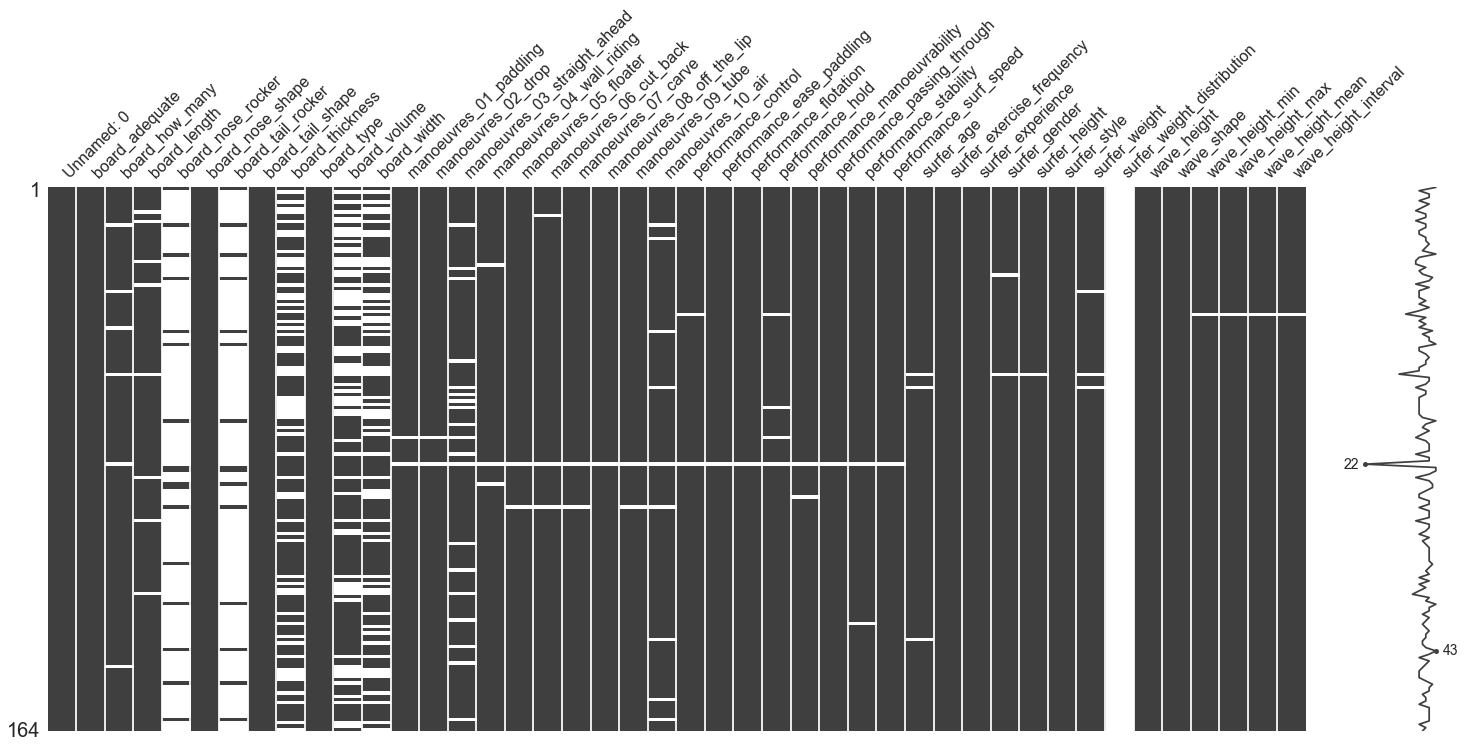

In [9]:
msn.matrix(df_surf);

In [10]:
df_surf.describe()

,Unnamed: 0,board_how_many,board_length,board_nose_rocker,board_tail_rocker,board_thickness,board_volume,board_width,performance_manoeuvrability,surfer_age,surfer_height,surfer_weight,surfer_weight_distribution,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
count,164.00000,158.000000,156.000000,17.000000,15.000000,106.000000,101.000000,108.000000,162.000000,161.000000,163.000000,161.000000,0.0,163.000000,163.000000,163.000000,163.000000
mean,81.50000,3.234177,1.812355,3.647647,2.491667,2.467925,30.852970,19.434028,0.776749,34.571429,1.757301,75.152174,NaN,3.748466,4.276074,4.012270,0.527607
std,47.48684,4.850855,0.122506,0.635819,0.303317,0.244309,7.819819,0.983585,0.206154,7.927574,0.073283,10.538774,NaN,1.101870,1.049917,0.971747,0.925048
min,0.00000,1.000000,1.549400,3.125000,1.562500,2.000000,22.000000,18.000000,0.166667,16.000000,1.570000,36.000000,NaN,2.000000,2.000000,2.000000,0.000000
25%,40.75000,2.000000,1.752600,3.250000,2.500000,2.312500,27.000000,18.750000,0.666667,29.000000,1.710000,70.000000,NaN,3.000000,4.000000,3.000000,0.000000
50%,81.50000,2.000000,1.803400,3.250000,2.500000,2.375000,28.800000,19.250000,0.833333,33.000000,1.760000,75.000000,NaN,4.000000,4.000000,4.000000,0.000000
75%,122.25000,4.000000,1.854200,4.125000,2.750000,2.590625,32.300000,19.781250,1.000000,39.000000,1.800000,80.000000,NaN,5.000000,5.000000,5.000000,1.000000
max,163.00000,60.000000,2.438400,4.750000,2.750000,3.625000,83.500000,22.500000,1.000000,57.000000,1.940000,120.000000,NaN,6.000000,6.000000,6.000000,4.000000


In [11]:
df_surf_drop = df_surf.drop(['board_nose_rocker', 'board_tail_rocker', 'board_thickness', 'board_volume', 'board_width', 'surfer_weight_distribution'],axis = 1) 

In [12]:
df_surf_drop.isnull().sum()

Unnamed: 0                       0
board_adequate                   0
board_how_many                   6
board_length                     8
board_nose_shape                 0
board_tail_shape                 0
board_type                       0
manoeuvres_01_paddling           2
manoeuvres_02_drop               2
manoeuvres_03_straight_ahead    19
manoeuvres_04_wall_riding        3
manoeuvres_05_floater            2
manoeuvres_06_cut_back           3
manoeuvres_07_carve              2
manoeuvres_08_off_the_lip        1
manoeuvres_09_tube               2
manoeuvres_10_air                9
performance_control              2
performance_ease_paddling        1
performance_flotation            1
performance_hold                 4
performance_manoeuvrability      2
performance_passing_through      1
performance_stability            2
performance_surf_speed           1
surfer_age                       3
surfer_exercise_frequency        0
surfer_experience                0
surfer_gender       

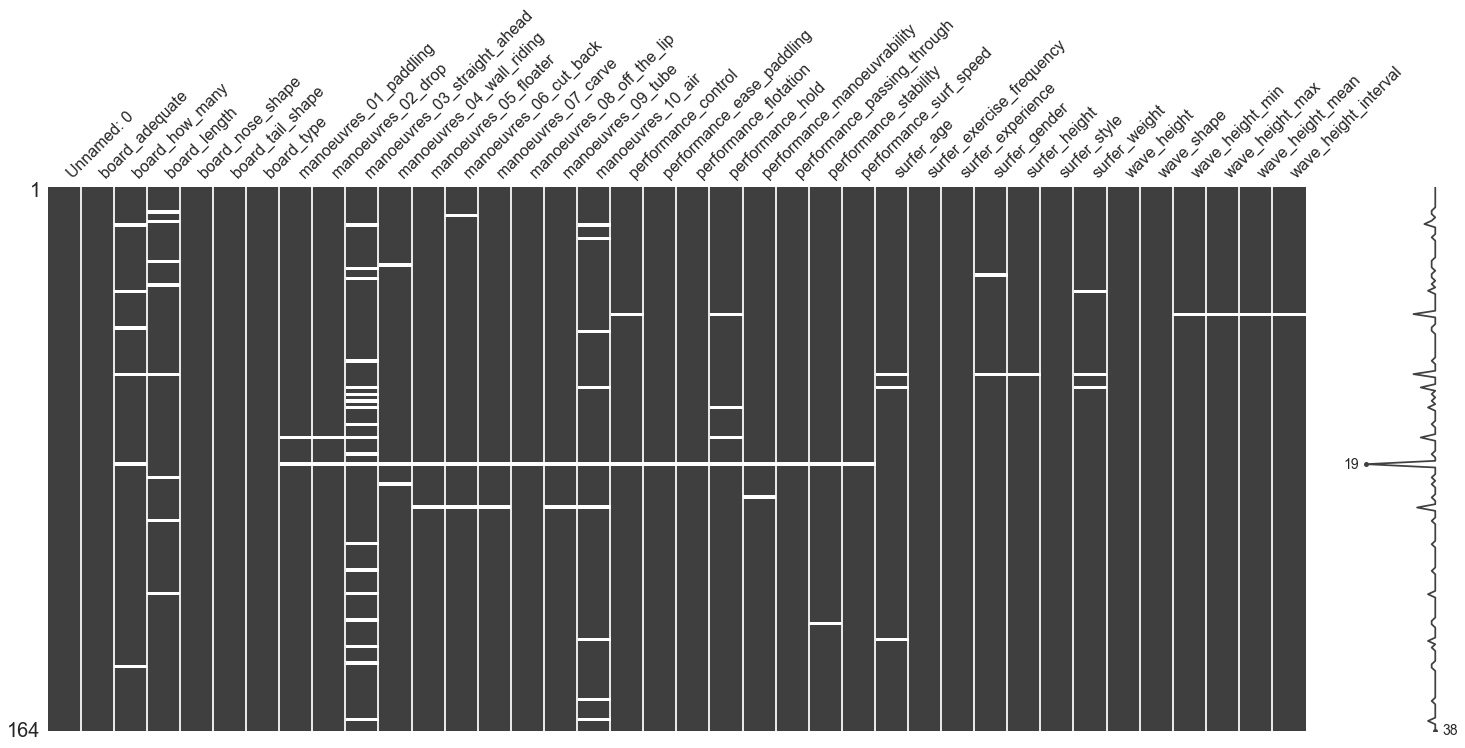

In [13]:
msn.matrix(df_surf_drop);

In [15]:
df_surf_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    164 non-null    int64  
 1   board_adequate                164 non-null    object 
 2   board_how_many                158 non-null    float64
 3   board_length                  156 non-null    float64
 4   board_nose_shape              164 non-null    object 
 5   board_tail_shape              164 non-null    object 
 6   board_type                    164 non-null    object 
 7   manoeuvres_01_paddling        162 non-null    object 
 8   manoeuvres_02_drop            162 non-null    object 
 9   manoeuvres_03_straight_ahead  145 non-null    object 
 10  manoeuvres_04_wall_riding     161 non-null    object 
 11  manoeuvres_05_floater         162 non-null    object 
 12  manoeuvres_06_cut_back        161 non-null    object 
 13  manoe

In [16]:
df_surf = df_surf_drop

In [17]:
df_surf['board_adequate'] = df_surf['board_adequate'].astype(str)

df_surf['board_nose_shape'] = df_surf['board_nose_shape'].astype(str)

df_surf['board_tail_shape'] = df_surf['board_tail_shape'].astype(str)

df_surf['board_type'] = df_surf['board_type'].astype(str)

df_surf['manoeuvres_01_paddling'] = df_surf['manoeuvres_01_paddling'].astype(str)

df_surf['manoeuvres_02_drop'] = df_surf['manoeuvres_02_drop'].astype(str)

df_surf['manoeuvres_03_straight_ahead'] = df_surf['manoeuvres_03_straight_ahead'].astype(str)

df_surf['manoeuvres_04_wall_riding'] = df_surf['manoeuvres_04_wall_riding'].astype(str)

df_surf['manoeuvres_05_floater'] = df_surf['manoeuvres_05_floater'].astype(str)

df_surf['manoeuvres_06_cut_back'] = df_surf['manoeuvres_06_cut_back'].astype(str)

df_surf['manoeuvres_07_carve'] = df_surf['manoeuvres_07_carve'].astype(str)

df_surf['manoeuvres_08_off_the_lip'] = df_surf['manoeuvres_08_off_the_lip'].astype(str)

df_surf['manoeuvres_09_tube'] = df_surf['manoeuvres_09_tube'].astype(str)

df_surf['manoeuvres_10_air'] = df_surf['manoeuvres_10_air'].astype(str)

df_surf['performance_control'] = df_surf['performance_control'].astype(str)

df_surf['performance_ease_paddling'] = df_surf['performance_ease_paddling'].astype(str)

df_surf['performance_flotation'] = df_surf['performance_flotation'].astype(str)

df_surf['performance_hold'] = df_surf['performance_hold'].astype(str)

df_surf['performance_manoeuvrability'] = df_surf['performance_manoeuvrability'].astype(float)

df_surf['performance_passing_through'] = df_surf['performance_passing_through'].astype(str)

df_surf['performance_stability'] = df_surf['performance_stability'].astype(str)

df_surf['performance_surf_speed'] = df_surf['performance_surf_speed'].astype(str)

df_surf['surfer_exercise_frequency'] = df_surf['surfer_exercise_frequency'].astype(str)

df_surf['surfer_experience'] = df_surf['surfer_experience'].astype(str)

df_surf['surfer_gender'] = df_surf['surfer_gender'].astype(str)

df_surf['surfer_style'] = df_surf['surfer_style'].astype(str)

df_surf['wave_shape'] = df_surf['wave_shape'].astype(str)


In [18]:
cnt = Counter()
for text in df_surf["manoeuvres_01_paddling"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('Always', 119), ('Usually', 38), ('Sometimes', 5), ('nan', 2)]

In [19]:
df_surf['manoeuvres_01_paddling'].fillna('Always', inplace=True)

In [20]:
cnt = Counter()
for text in df_surf["board_adequate"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('Suitable', 79),
 ('Very', 42),
 ('More', 38),
 ('or', 38),
 ('less', 38),
 ('suitable', 37),
 ('inadequate', 5),
 ('Inadequate', 5)]

In [21]:
## df_surf['board_adequate'].fillna('Suitable', inplace=True) -- No Missing Values

In [22]:
cnt = Counter()
for text in df_surf["board_nose_shape"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Pointed', 129), ('Rounded_pointed', 26), ('Round', 9)]

In [23]:
df_surf['board_nose_shape'].fillna('Pointed', inplace=True)

In [24]:
cnt = Counter()
for text in df_surf["board_tail_shape"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(35)

[('Neutral', 77),
 ('(Squash,', 77),
 ('Square)', 77),
 ('Outward', 54),
 ('(Round,', 54),
 ('Round-Pin,', 54),
 ('Pin)', 54),
 ('Inward', 29),
 ('(Fish-tail,', 29),
 ('Swallow,', 29),
 ('Bat', 29),
 ('wing,', 29),
 ('Half', 29),
 ('moon)', 29),
 ('Round', 4),
 ('squash', 4)]

In [25]:
## df_surf['board_tail_shape'].fillna('Always', inplace=True) -- No Missing Values

In [26]:
cnt = Counter()
for text in df_surf["board_type"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Shortboard', 92),
 ('All-around', 47),
 ('Funboard', 9),
 ('Fish', 8),
 ('Groveler', 7),
 ('Semi-gun', 1)]

In [27]:
## df_surf['board_type'].fillna('Shortboard', inplace=True)

In [28]:
cnt = Counter()
for text in df_surf["manoeuvres_02_drop"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Always', 84),
 ('Usually', 62),
 ('Sometimes', 15),
 ('nan', 2),
 ('I', 1),
 ('dont', 1),
 ('know', 1)]

In [29]:
df_surf['manoeuvres_02_drop'].fillna('Always', inplace=True)

In [30]:
cnt = Counter()
for text in df_surf["manoeuvres_03_straight_ahead"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Always', 97),
 ('Usually', 32),
 ('nan', 19),
 ('Sometimes', 8),
 ('I', 7),
 ('dont', 7),
 ('know', 7),
 ('Not', 1),
 ('yet', 1)]

In [31]:
df_surf['manoeuvres_03_straight_ahead'].fillna('Always', inplace=True)

In [32]:
cnt = Counter()
for text in df_surf["manoeuvres_04_wall_riding"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Always', 99),
 ('Usually', 38),
 ('Sometimes', 15),
 ('Not', 6),
 ('yet', 6),
 ('I', 3),
 ('dont', 3),
 ('know', 3),
 ('nan', 3)]

In [33]:
df_surf['manoeuvres_04_wall_riding'].fillna('Always', inplace=True)

In [34]:
cnt = Counter()
for text in df_surf["manoeuvres_05_floater"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Always', 47),
 ('Sometimes', 42),
 ('Not', 38),
 ('yet', 38),
 ('Usually', 28),
 ('I', 7),
 ('dont', 7),
 ('know', 7),
 ('nan', 2)]

In [35]:
df_surf['manoeuvres_05_floater'].fillna('Always', inplace=True)

In [36]:
cnt = Counter()
for text in df_surf["manoeuvres_06_cut_back"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Usually', 43),
 ('Always', 43),
 ('Sometimes', 38),
 ('Not', 32),
 ('yet', 32),
 ('I', 5),
 ('dont', 5),
 ('know', 5),
 ('nan', 3)]

In [37]:
df_surf['manoeuvres_06_cut_back'].fillna('Usually', inplace=True)

In [38]:
cnt = Counter()
for text in df_surf["manoeuvres_07_carve"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Always', 53),
 ('Usually', 38),
 ('Sometimes', 38),
 ('Not', 29),
 ('yet', 29),
 ('I', 4),
 ('dont', 4),
 ('know', 4),
 ('nan', 2)]

In [39]:
df_surf['manoeuvres_07_carve'].fillna('Always', inplace=True)

In [40]:
cnt = Counter()
for text in df_surf["manoeuvres_08_off_the_lip"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Sometimes', 49),
 ('Always', 48),
 ('Usually', 45),
 ('Not', 17),
 ('yet', 17),
 ('I', 4),
 ('dont', 4),
 ('know', 4),
 ('nan', 1)]

In [41]:
df_surf['manoeuvres_08_off_the_lip'].fillna('Sometimes', inplace=True)

In [42]:
cnt = Counter()
for text in df_surf["manoeuvres_09_tube"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Not', 56),
 ('yet', 56),
 ('Sometimes', 55),
 ('Always', 27),
 ('Usually', 14),
 ('I', 10),
 ('dont', 10),
 ('know', 10),
 ('nan', 2)]

In [43]:
df_surf['manoeuvres_09_tube'].fillna('Not yet', inplace=True)

In [44]:
cnt = Counter()
for text in df_surf["manoeuvres_10_air"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Not', 100),
 ('yet', 100),
 ('I', 23),
 ('dont', 23),
 ('know', 23),
 ('Sometimes', 20),
 ('nan', 9),
 ('Usually', 9),
 ('Always', 3)]

In [45]:
df_surf['manoeuvres_10_air'].fillna('Not yet', inplace=True)

In [46]:
cnt = Counter()
for text in df_surf["performance_passing_through"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Excellent', 67),
 ('Good', 53),
 ('Average', 30),
 ('Poor', 7),
 ('Fair', 6),
 ('nan', 1)]

In [47]:
df_surf['performance_passing_through'].fillna('Excellent', inplace=True)

In [48]:
cnt = Counter()
for text in df_surf["performance_control"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Good', 61),
 ('Excellent', 47),
 ('Average', 34),
 ('Fair', 13),
 ('I', 4),
 ('dont', 4),
 ('know', 4),
 ('Poor', 3),
 ('nan', 2)]

In [49]:
df_surf['performance_control'].fillna('Good', inplace=True)

In [50]:
cnt = Counter()
for text in df_surf["performance_ease_paddling"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Excellent', 62),
 ('Good', 60),
 ('Average', 31),
 ('Fair', 8),
 ('Poor', 2),
 ('nan', 1)]

In [51]:
df_surf['performance_ease_paddling'].fillna('Excellent', inplace=True)

In [52]:
cnt = Counter()
for text in df_surf["performance_flotation"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Excellent', 65),
 ('Good', 50),
 ('Average', 29),
 ('Fair', 13),
 ('I', 3),
 ('dont', 3),
 ('know', 3),
 ('Poor', 3),
 ('nan', 1)]

In [53]:
df_surf['performance_flotation'].fillna('Excellent', inplace=True)

In [54]:
cnt = Counter()
for text in df_surf["performance_hold"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Good', 58),
 ('Excellent', 45),
 ('Average', 35),
 ('Fair', 13),
 ('I', 7),
 ('dont', 7),
 ('know', 7),
 ('nan', 4),
 ('Poor', 2)]

In [55]:
df_surf['performance_hold'].fillna('Good', inplace=True)

In [56]:
cnt = Counter()
for text in df_surf["performance_stability"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Good', 73),
 ('Excellent', 55),
 ('Average', 27),
 ('Fair', 6),
 ('nan', 2),
 ('Poor', 1)]

In [57]:
df_surf['performance_stability'].fillna('Good', inplace=True)

In [58]:
cnt = Counter()
for text in df_surf["performance_surf_speed"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Good', 56),
 ('Excellent', 45),
 ('Average', 42),
 ('Fair', 12),
 ('Poor', 6),
 ('I', 2),
 ('dont', 2),
 ('know', 2),
 ('nan', 1)]

In [59]:
df_surf['performance_surf_speed'].fillna('Good', inplace=True)

In [60]:
cnt = Counter()
for text in df_surf["surfer_exercise_frequency"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('a', 164),
 ('week', 145),
 ('Twice', 89),
 ('Once', 38),
 ('Five', 32),
 ('times', 32),
 ('month', 14),
 ('More', 5),
 ('than', 5),
 ('once', 5)]

In [61]:
df_surf['surfer_exercise_frequency'].fillna('Twice a week', inplace=True)

In [62]:
cnt = Counter()
for text in df_surf["surfer_experience"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Advanced', 81),
 ('Intermediate', 66),
 ('Beginner', 10),
 ('First-timer', 4),
 ('Pro', 3)]

In [63]:
##df_surf['surfer_experience'].fillna('Advanced', inplace=True)

In [64]:
cnt = Counter()
for text in df_surf["surfer_gender"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Male', 152), ('Female', 10), ('nan', 2)]

In [65]:
df_surf['surfer_gender'].fillna('Male', inplace=True)

In [66]:
cnt = Counter()
for text in df_surf["surfer_style"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(11)

[('Neutral', 90),
 ('Smooth', 47),
 ('(recreative)', 47),
 ('Agressive', 23),
 ('(competitive)', 23),
 ('I', 4),
 ('dont', 4),
 ('know', 4)]

In [67]:
## df_surf['surfer_style'].fillna('Neutral', inplace=True)

In [68]:
cnt = Counter()
for text in df_surf["wave_shape"].values:
    for word in text.split():
        cnt[word] += 1        
cnt.most_common(10)

[('Spilling/Plunging', 97),
 ('Plunging', 42),
 ('Spilling,', 32),
 ('Spilling', 24),
 ('Spilling/Plunging,', 24),
 ('I', 1),
 ('dont', 1),
 ('know', 1)]

In [69]:
## df_surf['wave_shape'].fillna('Spilling/Plunging', inplace=True)

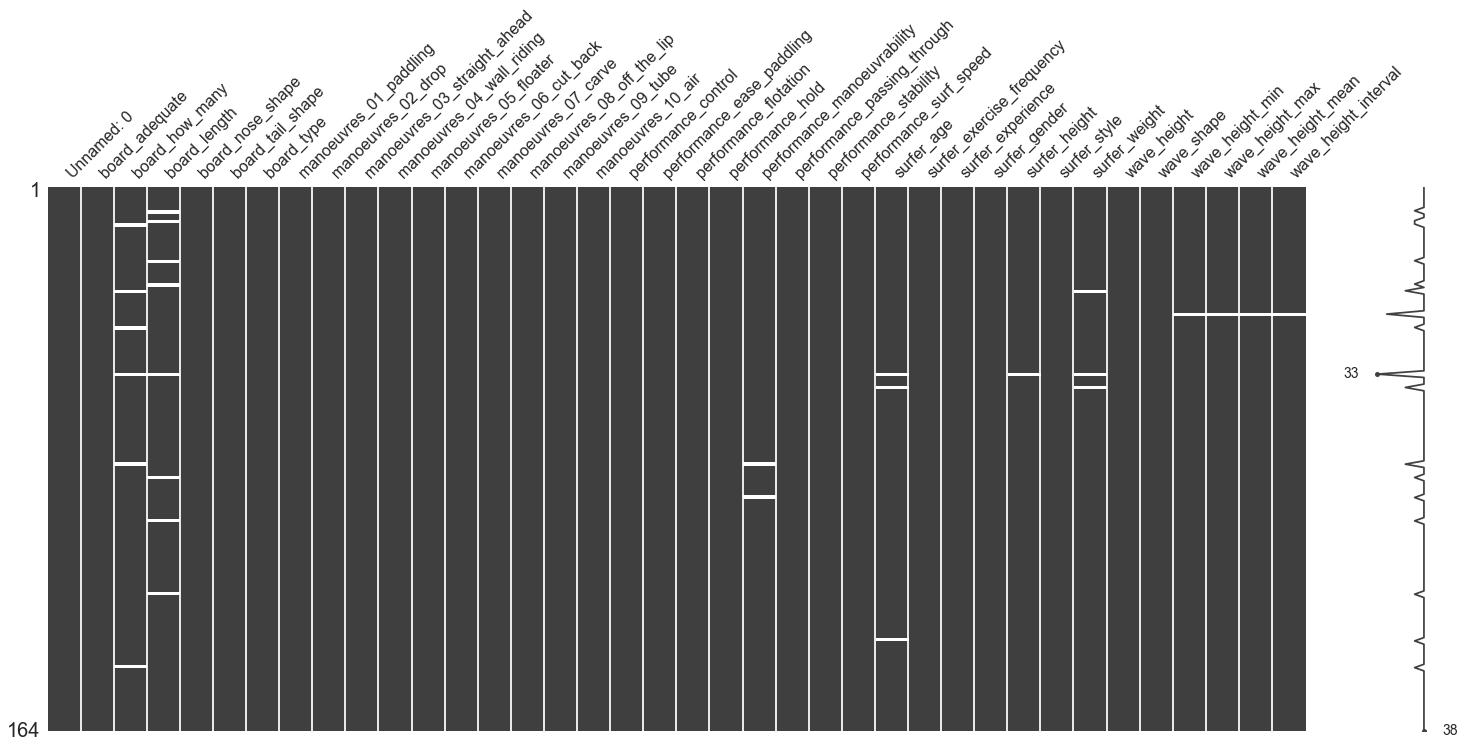

In [70]:
msn.matrix(df_surf);

In [71]:
mean_surf = df_surf['board_how_many'].mean()
df_surf['board_how_many'].fillna(value=mean_surf, inplace=True)

In [72]:
mean_surf1 = df_surf['board_length'].mean()
df_surf['board_length'].fillna(value=mean_surf1, inplace=True)

In [73]:
mean_surf2 = df_surf['performance_manoeuvrability'].mean()
df_surf['performance_manoeuvrability'].fillna(value=mean_surf2, inplace=True)

In [74]:
mean_surf3 = df_surf['surfer_age'].mean()
df_surf['surfer_age'].fillna(value=mean_surf3, inplace=True)

In [75]:
mean_surf4 = df_surf['surfer_height'].mean()
df_surf['surfer_height'].fillna(value=mean_surf4, inplace=True)

In [76]:
mean_surf5 = df_surf['surfer_weight'].mean()
df_surf['surfer_weight'].fillna(value=mean_surf4, inplace=True)

In [77]:
mean_surf6 = df_surf['wave_height_min'].mean()
df_surf['wave_height_min'].fillna(value=mean_surf6, inplace=True)

In [78]:
mean_surf7 = df_surf['wave_height_max'].mean()
df_surf['wave_height_max'].fillna(value=mean_surf7, inplace=True)

In [79]:
mean_surf8 = df_surf['wave_height_mean'].mean()
df_surf['wave_height_mean'].fillna(value=mean_surf8, inplace=True)

In [80]:
mean_surf9 = df_surf['wave_height_interval'].mean()
df_surf['wave_height_interval'].fillna(value=mean_surf9, inplace=True)

In [81]:
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    164 non-null    int64  
 1   board_adequate                164 non-null    object 
 2   board_how_many                164 non-null    float64
 3   board_length                  164 non-null    float64
 4   board_nose_shape              164 non-null    object 
 5   board_tail_shape              164 non-null    object 
 6   board_type                    164 non-null    object 
 7   manoeuvres_01_paddling        164 non-null    object 
 8   manoeuvres_02_drop            164 non-null    object 
 9   manoeuvres_03_straight_ahead  164 non-null    object 
 10  manoeuvres_04_wall_riding     164 non-null    object 
 11  manoeuvres_05_floater         164 non-null    object 
 12  manoeuvres_06_cut_back        164 non-null    object 
 13  manoe

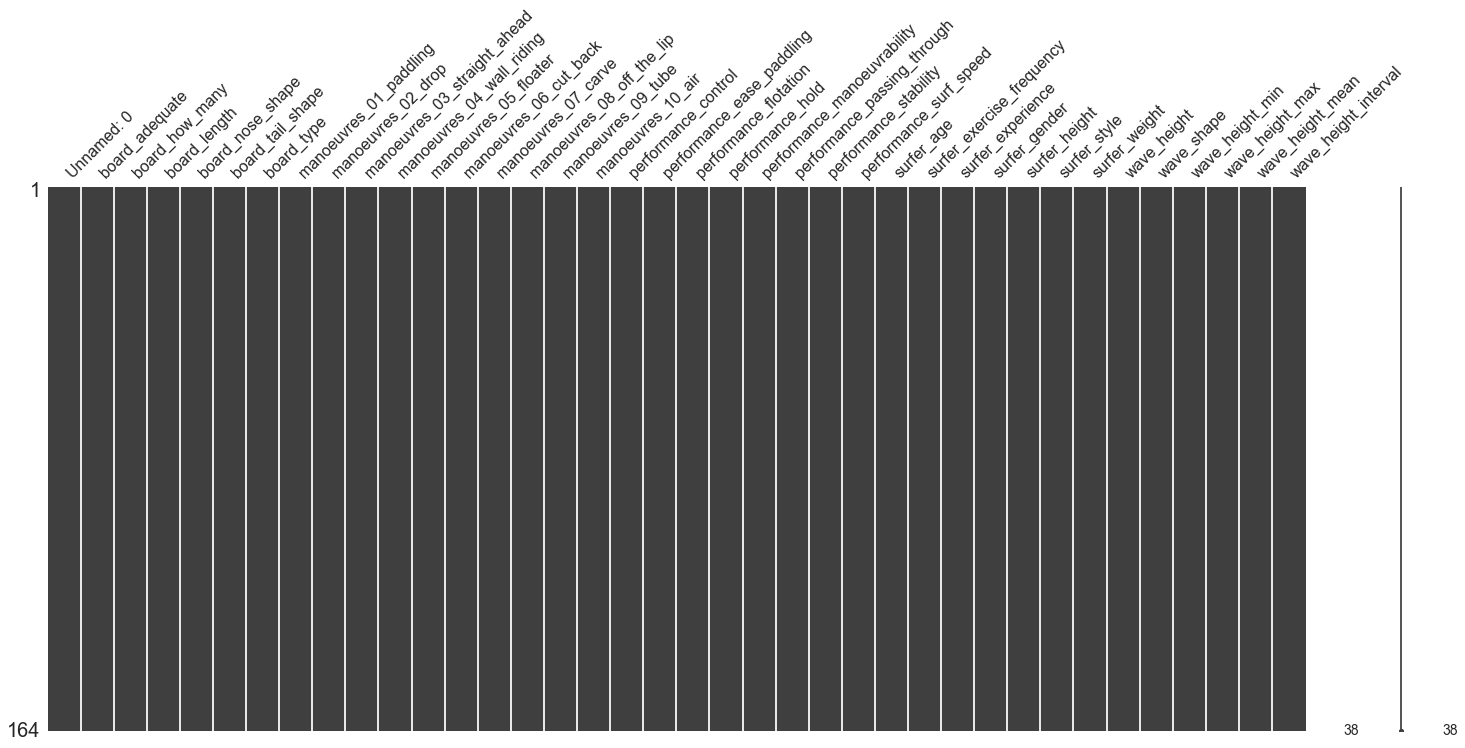

In [82]:
msn.matrix(df_surf);

In [83]:
df_surf.sample(20)

,Unnamed: 0,board_adequate,board_how_many,board_length,board_nose_shape,board_tail_shape,board_type,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_carve,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,performance_control,performance_ease_paddling,performance_flotation,performance_hold,performance_manoeuvrability,performance_passing_through,performance_stability,performance_surf_speed,surfer_age,surfer_exercise_frequency,surfer_experience,surfer_gender,surfer_height,surfer_style,surfer_weight,wave_height,wave_shape,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
62,62,Suitable,2.0,1.879600,Pointed,"Neutral (Squash, Square)",Shortboard,Usually,Usually,nan,Sometimes,Not yet,Not yet,Sometimes,Not yet,Not yet,Not yet,Fair,Average,Average,Fair,0.333333,Fair,Average,Fair,34.0,Once a week,Intermediate,Male,1.77,Smooth (recreative),80.0,3,Spilling,3.0,3.0,3.0,0.0
10,10,Suitable,4.0,1.812355,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Usually,Always,Usually,Always,Sometimes,Not yet,Good,Good,Average,Good,0.833333,Good,Average,Average,39.0,Once a week,Advanced,Male,1.79,Neutral,70.0,4,Spilling/Plunging,4.0,4.0,4.0,0.0
148,148,Very suitable,3.0,1.752600,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Always,Sometimes,Always,Always,Usually,Not yet,Excellent,Good,Good,Excellent,1.000000,Excellent,Excellent,Excellent,35.0,Five times a week,Advanced,Male,1.90,Neutral,82.0,4,Spilling/Plunging,4.0,4.0,4.0,0.0
68,68,Suitable,2.0,1.828800,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Sometimes,Not yet,Sometimes,Always,Not yet,Not yet,Average,Good,Average,Average,0.666667,Good,Good,Average,23.0,Twice a week,Intermediate,Male,1.87,Neutral,86.0,4,Spilling/Plunging,4.0,4.0,4.0,0.0
43,43,Suitable,3.0,1.778000,Pointed,"Outward (Round, Round-Pin, Pin)",Shortboard,Always,Always,Always,Always,Always,Always,Always,Always,Always,nan,Excellent,Excellent,Excellent,Excellent,0.833333,Excellent,Excellent,Excellent,55.0,Five times a week,Advanced,Male,1.68,Neutral,70.0,5,Spilling/Plunging,5.0,5.0,5.0,0.0
124,124,Suitable,4.0,1.803400,Pointed,"Inward (Fish-tail, Swallow, Bat wing, Half moon)",Shortboard,Usually,Usually,Always,Always,Usually,Sometimes,Usually,Usually,Not yet,Not yet,Average,Good,Good,Average,0.833333,Good,Good,Good,48.0,Twice a week,Intermediate,Male,1.69,Neutral,67.0,"3, 4",Spilling/Plunging,3.0,4.0,3.5,1.0
20,20,Very suitable,3.0,1.727200,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Excellent,Excellent,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,35.0,Five times a week,Advanced,Male,1.67,Agressive (competitive),66.0,5,Plunging,5.0,5.0,5.0,0.0
40,40,Very suitable,3.0,1.676400,Round,"Outward (Round, Round-Pin, Pin)",All-around,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not yet,Excellent,Good,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,45.0,Twice a week,Advanced,Male,1.67,Neutral,63.0,6,Plunging,6.0,6.0,6.0,0.0
115,115,Very suitable,6.0,1.752600,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,nan,Always,Always,Always,Always,Always,Usually,Usually,Excellent,Excellent,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,34.0,Twice a week,Advanced,Male,1.74,Neutral,75.0,5,Spilling/Plunging,5.0,5.0,5.0,0.0
94,94,Suitable,2.0,1.752600,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Always,Always,Always,Always,Usually,Usually,Excellent,Excellent,Excellent,Excellent,1.000000,Excellent,Excellent,Excellent,34.0,Five times a week,Advanced,Male,1.86,Neutral,82.0,3,Spilling/Plunging,3.0,3.0,3.0,0.0


In [87]:
df_advanced = df_surf[(df_surf['surfer_experience'].str.contains('Advanced'))]

df_advanced.sample(5)

,Unnamed: 0,board_adequate,board_how_many,board_length,board_nose_shape,board_tail_shape,board_type,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_carve,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,performance_control,performance_ease_paddling,performance_flotation,performance_hold,performance_manoeuvrability,performance_passing_through,performance_stability,performance_surf_speed,surfer_age,surfer_exercise_frequency,surfer_experience,surfer_gender,surfer_height,surfer_style,surfer_weight,wave_height,wave_shape,wave_height_min,wave_height_max,wave_height_mean,wave_height_interval
162,162,More or less,6.000000,1.8034,Pointed,"Neutral (Squash, Square)",All-around,Always,Usually,Usually,Usually,Usually,Usually,Usually,Sometimes,Sometimes,Not yet,Good,Average,Average,Good,0.833333,Good,Good,Good,24.0,Twice a week,Advanced,Male,1.73,Agressive (competitive),75.0,"3, 4","Spilling, Spilling/Plunging",3.0,4.0,3.5,1.0
83,83,Very inadequate,3.234177,1.8542,Pointed,"Neutral (Squash, Square)",Shortboard,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.776749,nan,nan,nan,55.0,Twice a week,Advanced,Male,1.82,Neutral,79.0,4,Spilling/Plunging,4.0,4.0,4.0,0.0
113,113,More or less,4.000000,1.7780,Pointed,"Neutral (Squash, Square)",Shortboard,Always,Always,Always,Always,Always,Always,Always,Always,Always,Not yet,Good,Good,Average,Good,0.833333,Good,Good,Average,32.0,Five times a week,Advanced,Male,1.83,Neutral,85.0,5,Spilling/Plunging,5.0,5.0,5.0,0.0
0,0,More or less,5.000000,1.8034,Pointed,"Outward (Round, Round-Pin, Pin)",Shortboard,Always,Always,Always,Always,Always,Usually,Usually,Usually,Usually,Sometimes,Good,Good,Good,Good,0.666667,Good,Good,Good,32.0,Once a week,Advanced,Male,1.72,Neutral,78.0,3,Spilling/Plunging,3.0,3.0,3.0,0.0
28,28,Suitable,2.000000,1.7780,Pointed,"Inward (Fish-tail, Swallow, Bat wing, Half moon)",All-around,Usually,Usually,Always,Usually,Not yet,Sometimes,Sometimes,Usually,Not yet,I dont know,Good,Average,Fair,Good,0.666667,Good,Average,Good,31.0,Twice a week,Advanced,Male,1.72,Neutral,65.0,5,Spilling/Plunging,5.0,5.0,5.0,0.0


# Part 2 Visualization 

In [84]:
## Potential for analysing relationships between variables regarding Manoeuvres and board information and Surfer Experience. 


# Part 3 Natural Language Processing - Sentiement Analysis